In [44]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
print len(w)
print len(r)

Reading files
132684
26111


In [46]:
# RA e DEC - catalogo Wen
w['RAJ2000'], w['DEJ2000']

(<MaskedColumn name='RAJ2000' dtype='float64' length=132684>
   0.00236
   0.00957
   0.01377
   0.01475
   0.01945
   0.02024
   0.02303
   0.02482
   0.02643
   0.02755
   0.02762
   0.02765
       ...
 359.96988
 359.97192
 359.97241
  359.9729
 359.97311
 359.97504
 359.97543
 359.98712
 359.99329
   359.995
 359.99677
  359.9986, <MaskedColumn name='DEJ2000' dtype='float64' length=132684>
  32.20925
   5.28827
  31.23175
  31.78564
   2.47386
  -3.54679
  35.76957
   15.4299
  22.20558
  10.11333
  31.87626
  29.35813
       ...
   0.69856
  -9.76429
  13.70903
   -7.9587
   3.45559
  30.13158
 -11.13708
  22.67506
  13.29671
   0.70175
  21.78513
  -3.43781)

In [47]:
# RA e DEC catalogo Redmapper
r['RA'], r['DEC']

(array([ 239.58332907,  250.08254839,  197.87295717, ...,  180.83079888,
         153.82422578,  135.96337099]),
 array([ 27.23341292,  46.71153135,  -1.34111628, ...,  52.37043161,
         43.63535754,  15.20173173]))

In [48]:
NSIDE = 128

In [49]:
# Area de cada pixel
hp.nside2pixarea(NSIDE, degrees = True)

0.2098234113027917

In [50]:
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])

In [51]:
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [52]:
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)

In [53]:
n = np.arange(hp.nside2npix(NSIDE))

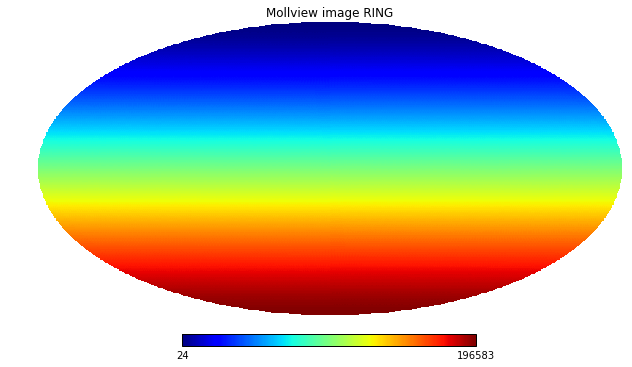

In [54]:
hp.mollview(n, title="Mollview image RING")

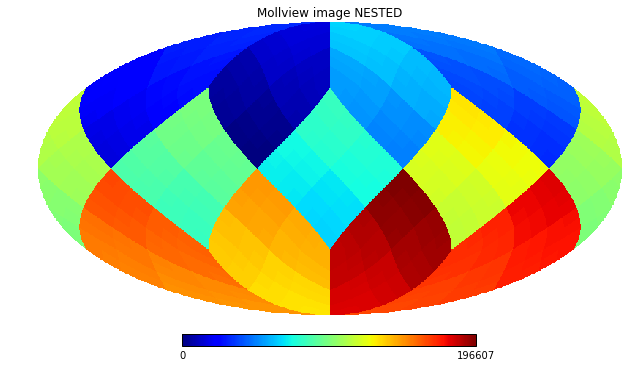

In [55]:
hp.mollview(n, nest=True, title="Mollview image NESTED")

In [56]:
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)

In [57]:
m = np.arange(hp.nside2npix(NSIDE))

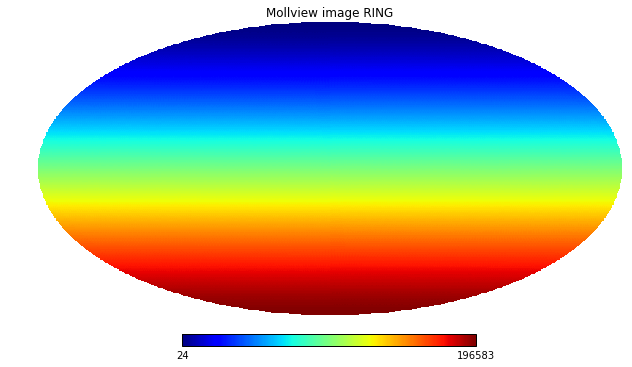

In [58]:
hp.mollview(m, title="Mollview image RING")

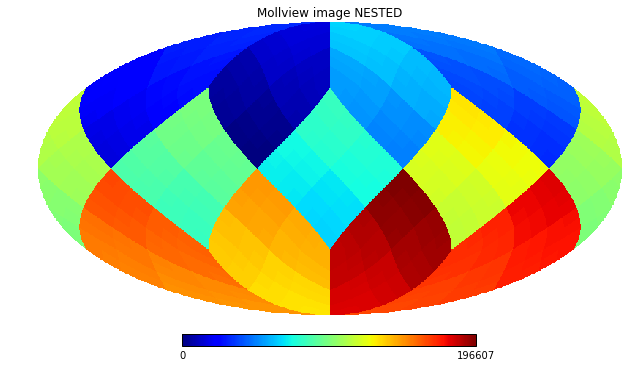

In [59]:
hp.mollview(m, nest=True, title="Mollview image NESTED")

In [60]:
print(hp.get_map_size(m))
print(hp.get_map_size(n))

196608
196608


In [61]:
print rpix, wpix

[ 53332  27002 100377 ...,  20402  30222  72641] DEJ2000
-------
  45312
  89344
  47360
  46336
  93440
 103680
  40192
  71936
  60672
  81152
    ...
 114944
  75008
 111872
  92416
  48384
 116992
  60671
  75008
  96512
  61696
 103680
Length = 132684 rows


In [62]:
# Coordenada dos pixels 
w_pix = hp.pix2ang(NSIDE, wpix)
r_pix = hp.pix2ang(NSIDE, rpix)

m = np.arange(hp.nside2npix(NSIDE))

print len(w_pix)
print len(r_pix)

2
2


In [63]:
w_pix[0]

1.00456149389
1.48213856115
1.0290593913
1.01685684793
1.52390414366
1.62811938159
0.941542498572
1.30194417347
1.18077479138
1.39806364863
1.01685684793


In [64]:
r_pix[0]

array([ 1.09467727,  0.75796425,  1.59163117, ...,  0.65596434,
        0.80626378,  1.30734259])

In [65]:
# Calculo do Match
i = 0
c = 0
for i in range (0, 132684):
    if 0<= i <26111:
        if w_pix[0][i] == r_pix[0][i]: 
            print 'galaxia do wen:', i, ',numero da coordenada:', w_pix[0][i],',galaxia do rykoff:', i 
            i = i + 1
            c = c + 1
    if 26111 <= i < 52222:
        if w_pix[0][i] == r_pix[0][i-26111]:
            print 'galaxia do wen:', i, ',numero da coordenada:', w_pix[0][i],',galaxia do rykoff:', i - 26111
            i = i + 1 
            c = c + 1
    if 52222 <= i < 78333:
        if w_pix[0][i] == r_pix[0][i-52222]:
            print 'galaxia do wen:', i, ',numero da coordenada:', w_pix[0][i],',galaxia do rykoff:', i - 52222
            i = i + 1
            c = c + 1
    if 78333 <= i < 104444:
        if w_pix[0][i] == r_pix[0][i-78333]:
            print 'galaxia do wen:', i, ',numero da coordenada:', w_pix[0][i],',galaxia do rykoff:', i - 78333
            i = i + 1
            c = c + 1
    if 104444 <= i < 130555:
        if w_pix[0][i] == r_pix[0][i-104444]:
            print 'galaxia do wen:', i, ',numero da coordenada:', w_pix[0][i],',galaxia do rykoff:', i - 104444
            i = i + 1
            c = c + 1
    if 130555 <= i < 132684:
        if w_pix[0][i] == r_pix[0][i-130555]:
            print 'galaxia do wen:', i, ',numero da coordenada:', w_pix[0][i],',galaxia do rykoff:', i - 130555
            i = i + 1
            c = c + 1
            print c

galaxia do wen: 64 ,numero da coordenada: 1.45071629147 ,galaxia do rykoff: 64
galaxia do wen: 289 ,numero da coordenada: 1.10636250572 ,galaxia do rykoff: 289
galaxia do wen: 689 ,numero da coordenada: 1.5968409378 ,galaxia do rykoff: 689
galaxia do wen: 703 ,numero da coordenada: 1.08880826033 ,galaxia do rykoff: 703
galaxia do wen: 1198 ,numero da coordenada: 1.41390345577 ,galaxia do rykoff: 1198
galaxia do wen: 1498 ,numero da coordenada: 1.54996148613 ,galaxia do rykoff: 1498
galaxia do wen: 1750 ,numero da coordenada: 1.49259163486 ,galaxia do rykoff: 1750
galaxia do wen: 1759 ,numero da coordenada: 1.25297262287 ,galaxia do rykoff: 1759
galaxia do wen: 1807 ,numero da coordenada: 1.57079632679 ,galaxia do rykoff: 1807
galaxia do wen: 2010 ,numero da coordenada: 1.61768850993 ,galaxia do rykoff: 2010
galaxia do wen: 2204 ,numero da coordenada: 1.45596076646 ,galaxia do rykoff: 2204
galaxia do wen: 3006 ,numero da coordenada: 1.33422071595 ,galaxia do rykoff: 3006
galaxia do wen:

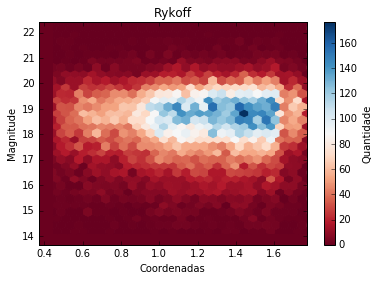

In [66]:
x = r_pix[0]
y = r['MODEL_MAG_R']
gridsize = 30
plt.hexbin(x, y, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu)
plt.xlabel('Coordenadas')
plt.ylabel('Magnitude')
cb = plt.colorbar()
cb.set_label('Quantidade')
plt.title('Rykoff')

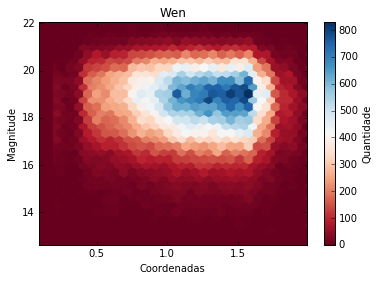

In [67]:
x = w_pix[0]
y = w['rmag']
gridsize = 30
plt.hexbin(x, y, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu)
plt.xlabel('Coordenadas')
plt.ylabel('Magnitude')
cb = plt.colorbar()
cb.set_label('Quantidade')
plt.title('Wen')

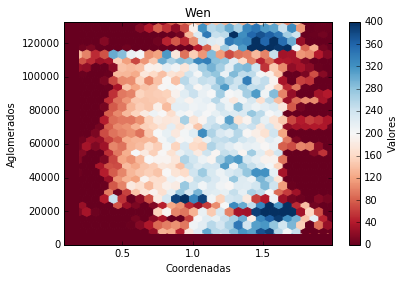

In [68]:
x = range (0,132684)
y = w_pix[0]
gridsize = 30
plt.hexbin(y,x, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu, vmin= 0, vmax = 400)
plt.xlabel('Coordenadas')
plt.ylabel('Aglomerados')
cb = plt.colorbar()
cb.set_label('Valores')
plt.title('Wen')  

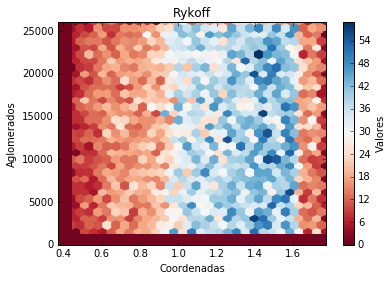

In [69]:
x = range (0,26111)
y = r_pix[0]
gridsize = 30
plt.hexbin(y,x, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu)
plt.xlabel('Coordenadas')
plt.ylabel('Aglomerados')
cb = plt.colorbar()
cb.set_label('Valores')
plt.title('Rykoff')  